Data Loading and Initial Inspection

In [ ]:
# prompt: Data Loading and Initial Inspection

import pandas as pd

# Load the dataset (replace 'your_file.csv' with the actual file path)
try:
  data = pd.read_csv('/content/Churn_Modelling.csv')
except FileNotFoundError:
  print("Error: '/content/Churn_Modelling.csv' not found. Please upload the file or provide the correct path.")
  data = None # Or handle the error as needed

# Display the first few rows of the dataset
if data is not None:
  print(data.head())

  # Get basic information about the dataset
  print(data.info())

  # Summary statistics for numerical columns
  print(data.describe())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790


Data Cleaning and Preprocessing

In [ ]:


# prompt: Data Cleaning and Preprocessing FOR ABOVE DATA

import pandas as pd
# Data Loading and Initial Inspection


# Load the dataset (replace 'your_file.csv' with the actual file path)
try:
  data = pd.read_csv('/content/Churn_Modelling.csv')
except FileNotFoundError:
  print("Error: '/content/Churn_Modelling.csv' not found. Please upload the file or provide the correct path.")
  data = None # Or handle the error as needed

# Display the first few rows of the dataset
if data is not None:
  print(data.head())

  # Get basic information about the dataset
  print(data.info())

  # Summary statistics for numerical columns
  print(data.describe())

# Data Cleaning and Preprocessing
if data is not None:
    # Check for missing values in each column
    print(data.isnull().sum())
    # Drop columns that are not relevant for the analysis or prediction
    data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


    #  Encoding Categorical Features
    data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

    #  Feature Scaling (if needed)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    # Select numerical columns to scale (excluding the target variable)
    numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

    # Fit the scaler on the numerical columns and transform the data
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
Exploratory Data Analysis (EDA)

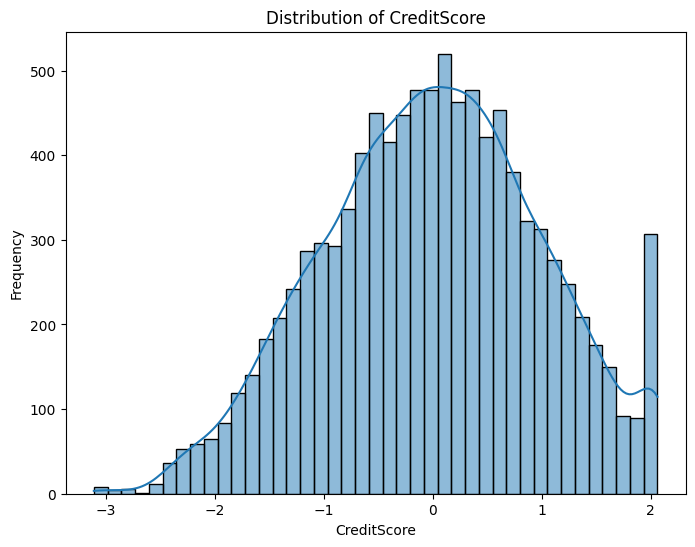

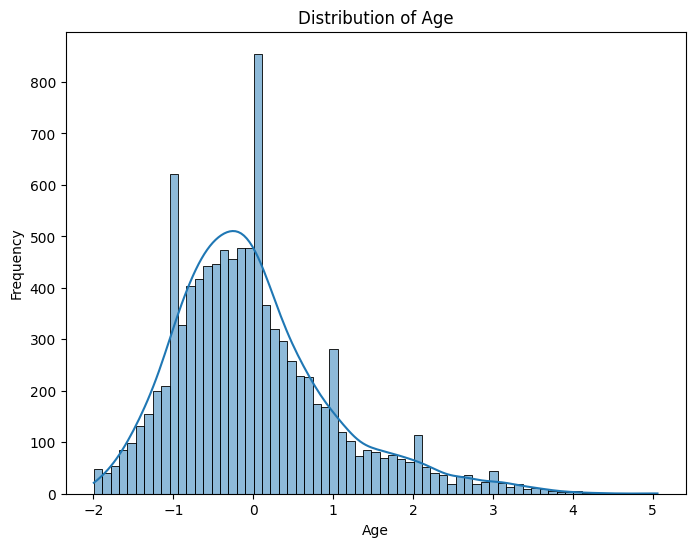

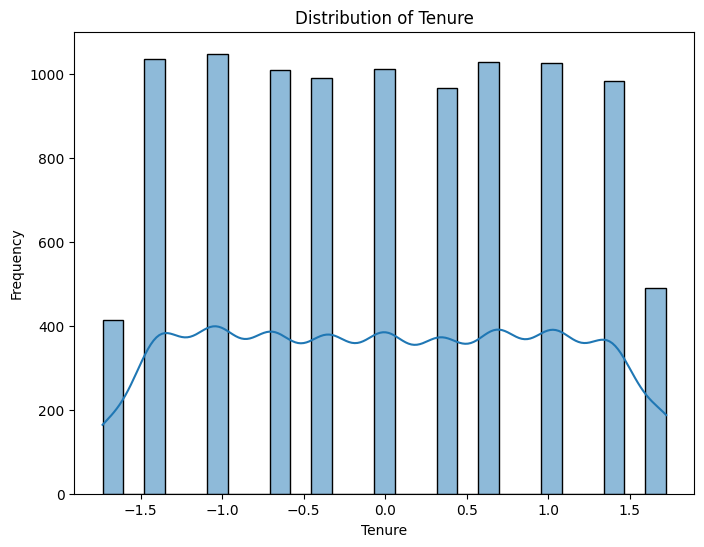

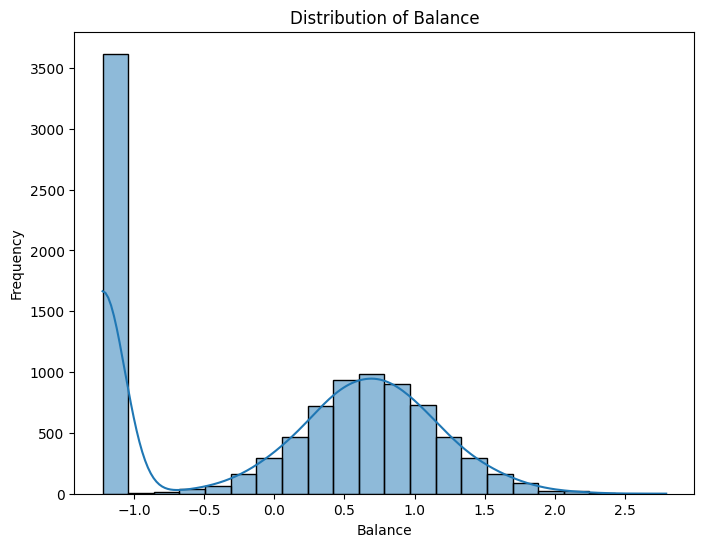

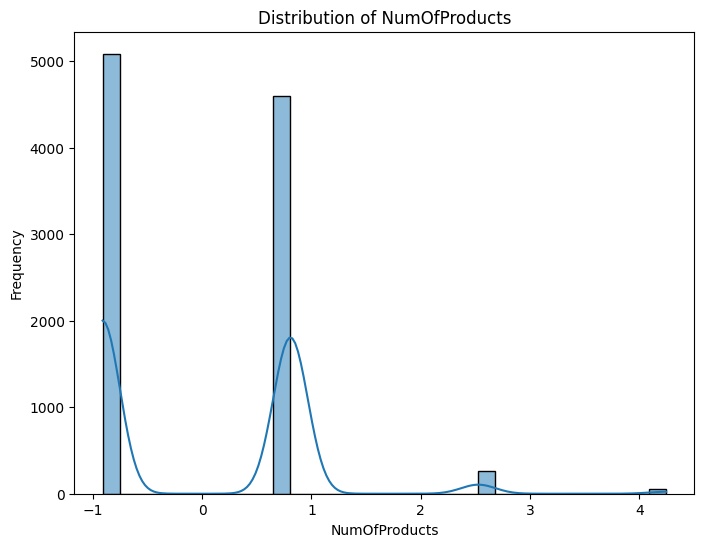

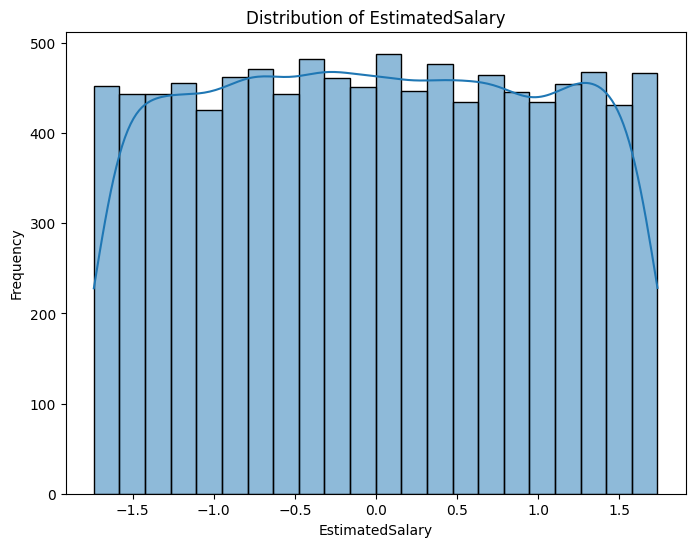

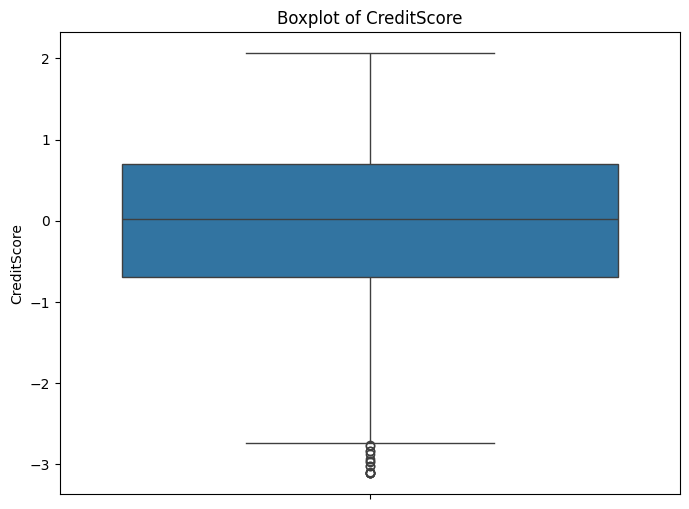

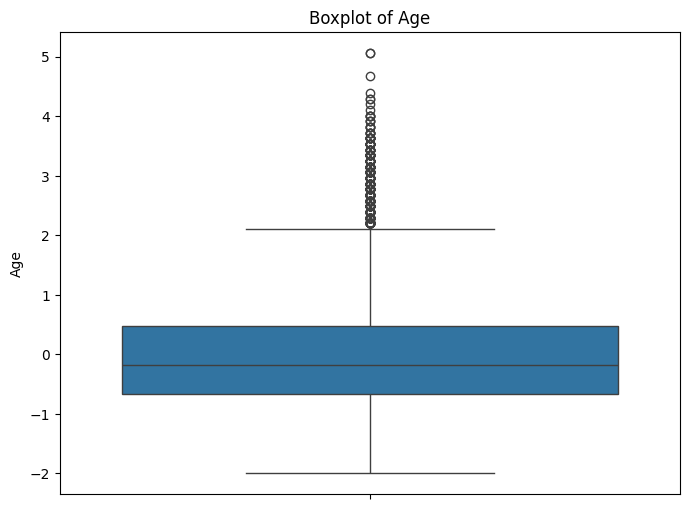

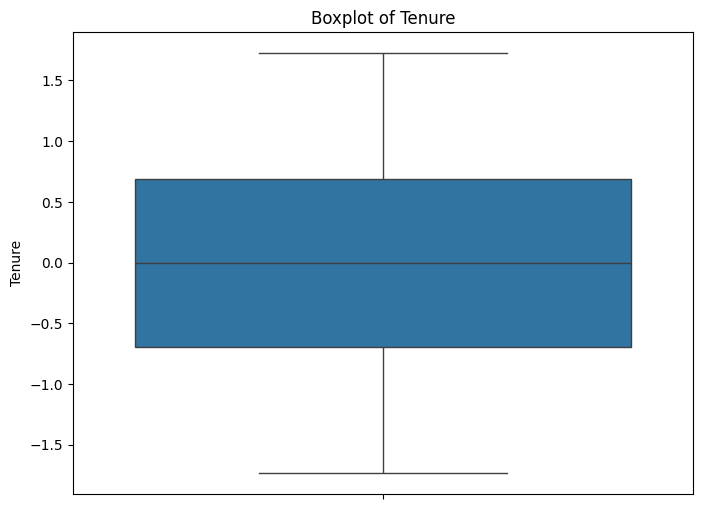

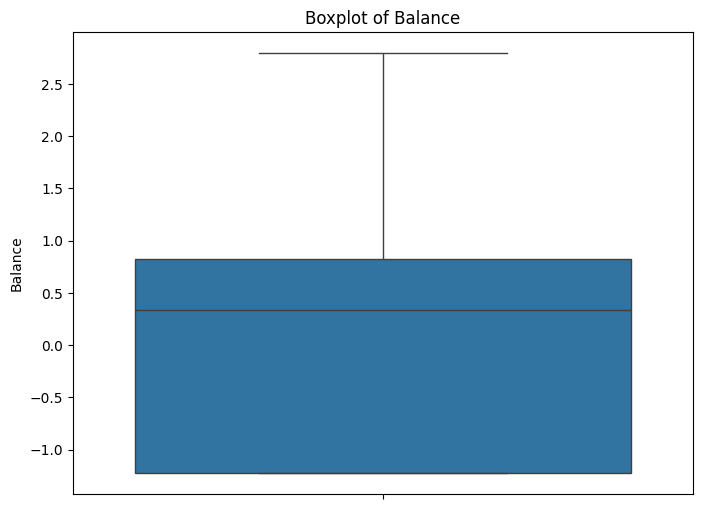

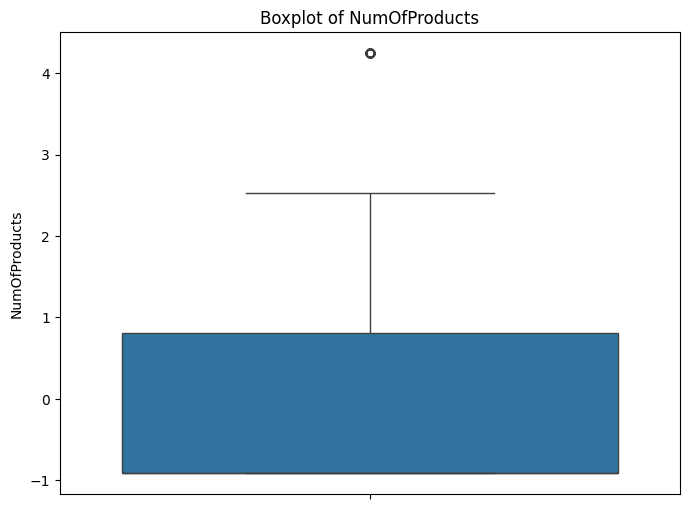

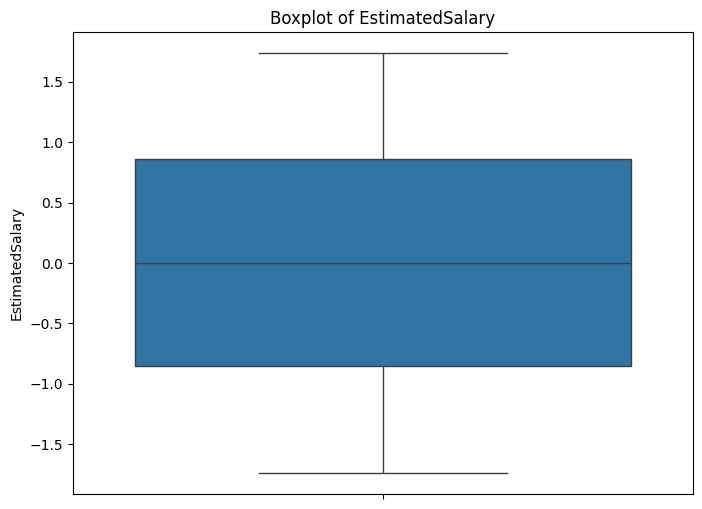

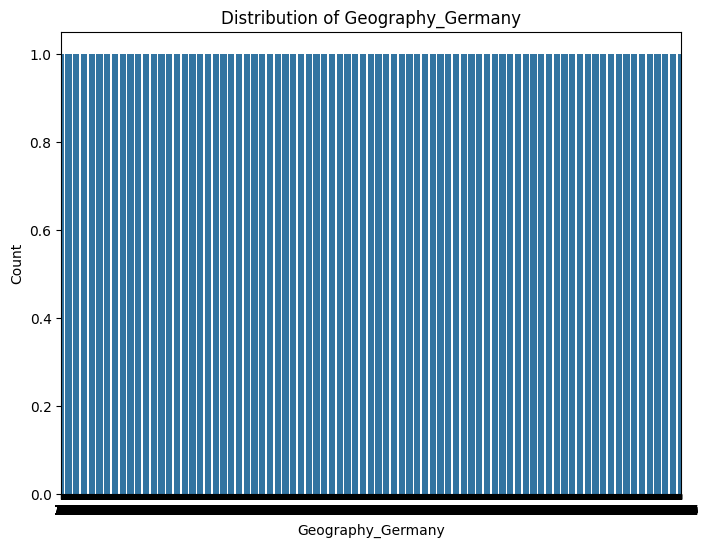

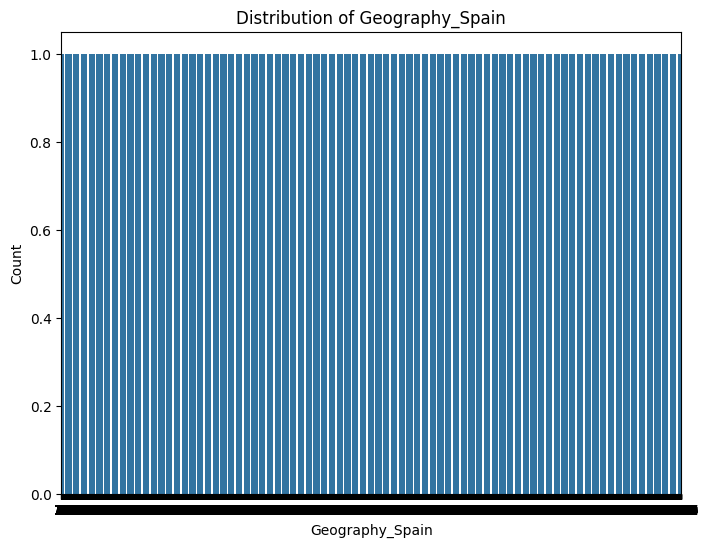

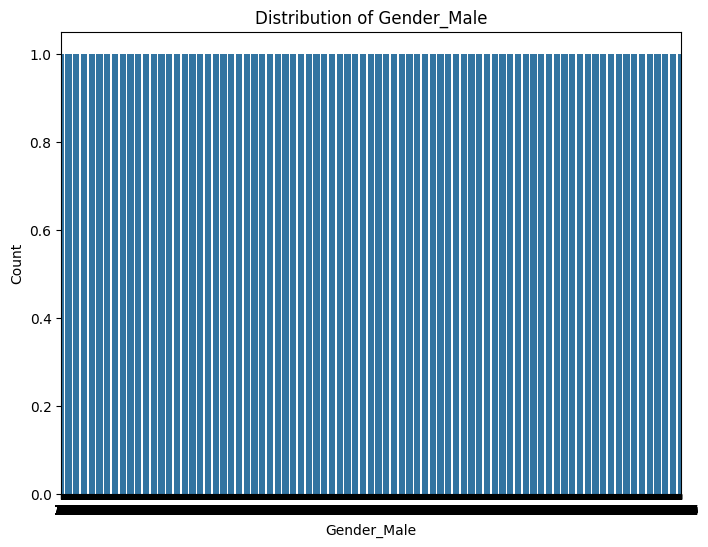

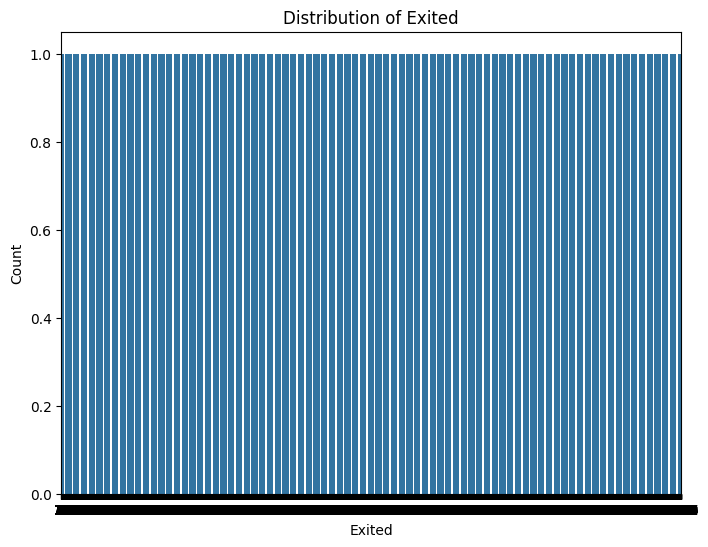

In [ ]:
# prompt: Exploratory Data Analysis (EDA)1.	Plot the distribution of the features ON DATASET

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and preprocessed as in the previous code

if data is not None:
    # Histograms for numerical features
    numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Boxplots for numerical features to visualize outliers
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data[col])
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        plt.show()

    # Countplots for categorical features
    categorical_cols = ['Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Exited']  # Assuming these are the categorical columns after encoding
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(data[col])
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

CORELATION MATRIX

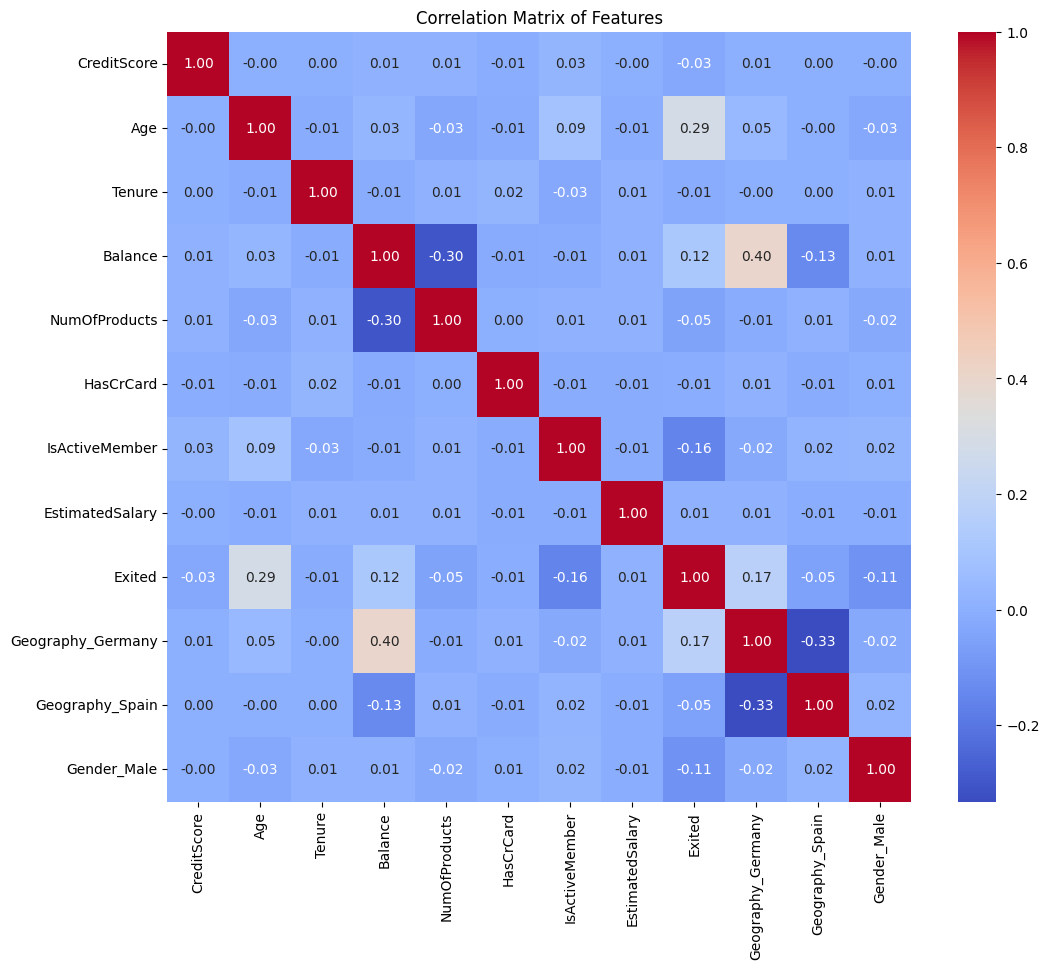

In [ ]:
# prompt: CORELATION MATRIX

import matplotlib.pyplot as plt
import seaborn as sns

if data is not None:
    plt.figure(figsize=(12, 10))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Features')
    plt.show()



Feature Engineering

In [ ]:
#Perform scaling or normalization for numerical features.

# Feature Engineering
if data is not None:
    # 1. Create new features
    # Tenure Group
    data['Tenure_Group'] = pd.cut(data['Tenure'], bins=[-1, 12, 24, 36, 60], labels=['0-12', '13-24', '25-36', '37-60'], include_lowest=True)
    data = pd.get_dummies(data, columns=['Tenure_Group'], drop_first=True)

    # Average Monthly Charges (handle potential division by zero)
    data['Average_Monthly_Charges'] = data['EstimatedSalary'] / (data['Tenure'] + 1e-8)  # Added a small value to avoid division by zero

    # 2. Create interaction features
    data['Tenure_MonthlyCharges_Interaction'] = data['Tenure'] * data['EstimatedSalary']


    # Display the updated DataFrame with new features
    print(data.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583          1   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583          0   
2    -1.536794  0.293517  1.032908  1.333053       2.527057          1   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737          0   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1         0.021886       1              False   
1               1         0.216534       0              False   
2               0         0.240687       1              False   
3               0        -0.108918       0              False   
4               1        -0.365276       0              False   

   Geography_Spain  Gender_Male  Tenure_Group_13-24  Tenure_Group_25-36  \
0            False        False               False               False   
1             

Correlation and Feature Selection



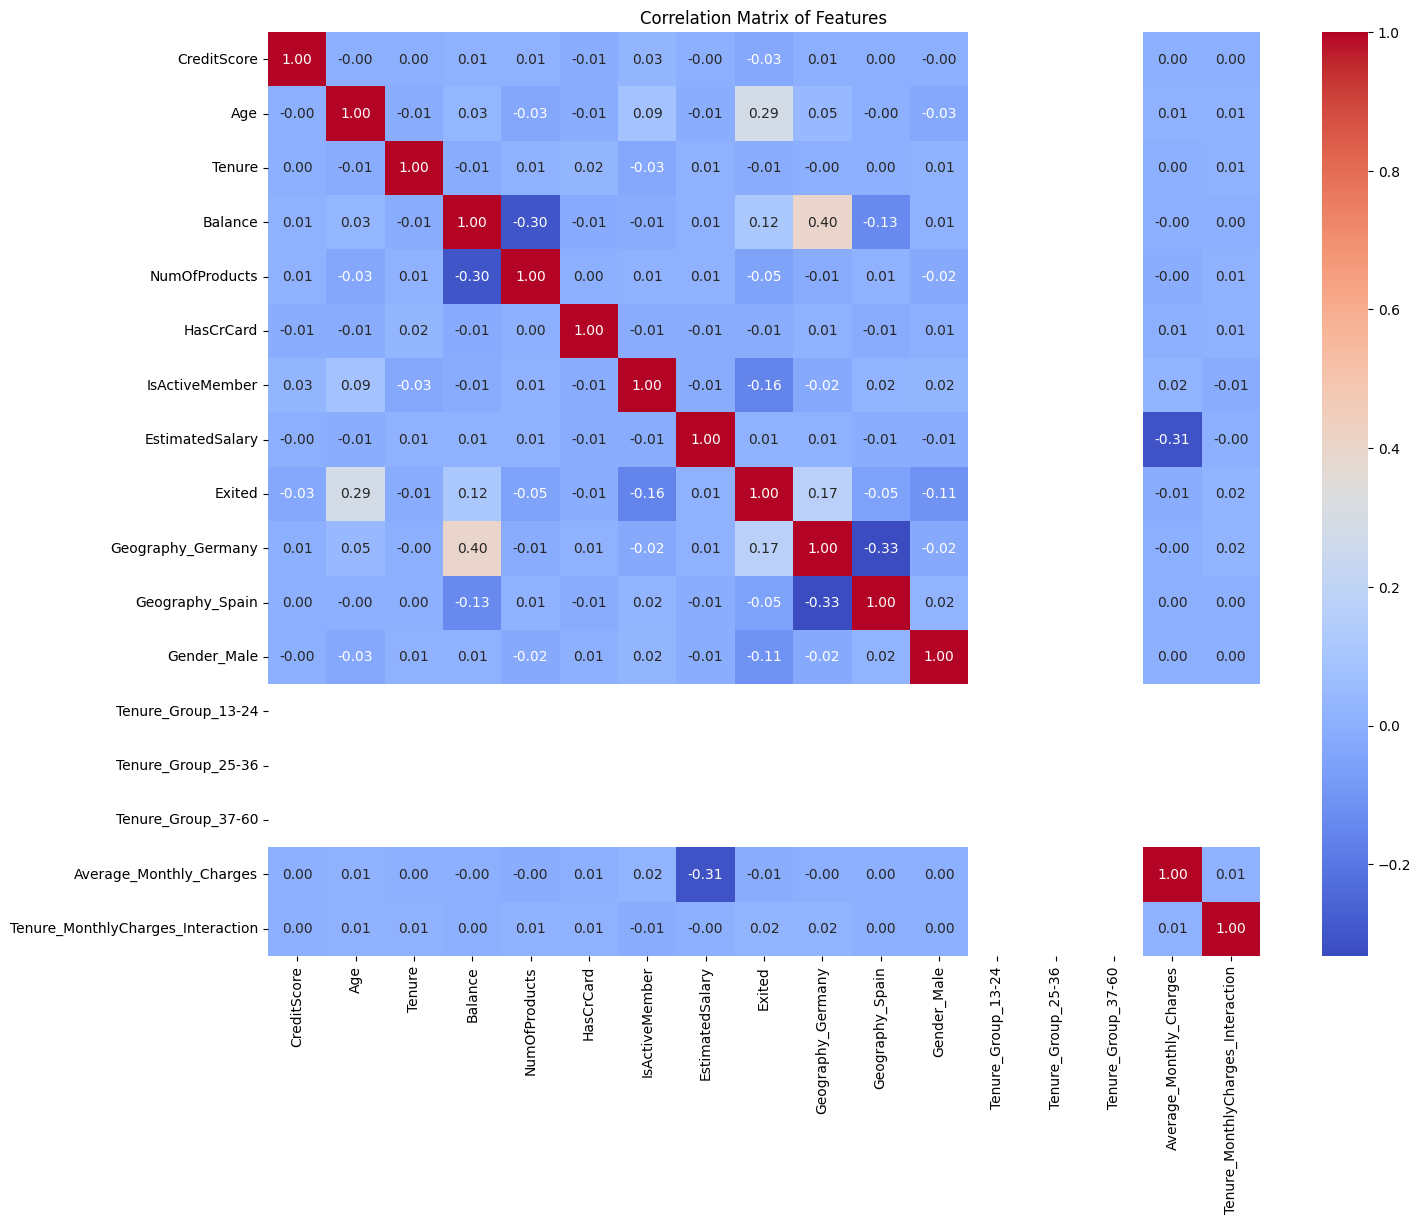


Top features influencing churn (based on absolute correlation):
 Age                  0.285323
Geography_Germany    0.173488
IsActiveMember       0.156128
Balance              0.118533
Gender_Male          0.106512
Name: Exited, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and preprocessed

if data is not None:
    # Compute the correlation matrix for numerical columns
    correlation_matrix = data.corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Features')
    plt.show()

    # Select top features influencing churn based on correlation with 'Exited'
    correlation_with_churn = correlation_matrix['Exited'].abs().sort_values(ascending=False)
    top_features = correlation_with_churn[1:6] # Exclude 'Exited' itself and get the top 5
    print("\nTop features influencing churn (based on absolute correlation):\n", top_features)




Model Building

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets.
# 	Build and compare the following models:
# 	Logistic Regression
# 	Random Forest
# 	Gradient Boosting (e.g., XGBoost or LightGBM)
# Evaluate models using:
# 	Accuracy
# 	Precision
#	Recall
# F1 Score
# ROC-AUC Score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

if data is not None:
    # Define features (X) and target variable (y)
    X = data.drop('Exited', axis=1)
    y = data['Exited']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting (XGBoost)': XGBClassifier()
    }

    # Train and evaluate each model
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

        results[model_name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'ROC-AUC Score': roc_auc_score(y_test, y_prob)
        }

    # Print the results
    for model_name, metrics in results.items():
        print(f'\n{model_name}:')
        for metric_name, metric_value in metrics.items():
            print(f'{metric_name}: {metric_value:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
Accuracy: 0.8105
Precision: 0.5500
Recall: 0.1959
F1 Score: 0.2889
ROC-AUC Score: 0.7781

Random Forest:
Accuracy: 0.8610
Precision: 0.7406
Recall: 0.4504
F1 Score: 0.5601
ROC-AUC Score: 0.8597

Gradient Boosting (XGBoost):
Accuracy: 0.8645
Precision: 0.7194
Recall: 0.5089
F1 Score: 0.5961
ROC-AUC Score: 0.8536


Model Optimization

In [ ]:
#  Model Optimization
# 1.	Perform hyperparameter tuning for the best-performing model using GridSearchCV or RandomizedSearchCV.
# 2.	Evaluate the optimized model on the testing set.

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

if data is not None:
    # Assuming 'X_train', 'y_train', 'X_test', and 'y_test' are already defined from the previous code

    # Example: Hyperparameter tuning for RandomForestClassifier using RandomizedSearchCV
    param_dist = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf_model = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    print("\nBest hyperparameters found by RandomizedSearchCV:", random_search.best_params_)
    print("Best ROC-AUC score found by RandomizedSearchCV:", random_search.best_score_)
     # Evaluate the best model on the testing set
    best_rf_model = random_search.best_estimator_
    y_pred_optimized = best_rf_model.predict(X_test)
    y_prob_optimized = best_rf_model.predict_proba(X_test)[:, 1]

    print("\nEvaluation of optimized Random Forest on the test set:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_optimized):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_optimized):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred_optimized):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_optimized):.4f}")




Best hyperparameters found by RandomizedSearchCV: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best ROC-AUC score found by RandomizedSearchCV: 0.8577553486320187

Evaluation of optimized Random Forest on the test set:
Accuracy: 0.8670
Precision: 0.7848
Recall: 0.4453
F1 Score: 0.5682
ROC-AUC Score: 0.8681
